## TO BE OR NOT TO BE problem solved by GA

Guess an expression by using a GA.

* a potential solution to the above problem: an array of chars. How many chars?
    - the length of expression
    - the number of different chars that appear in the given expression

* qualtity of a potential solution (fitness): distance (Hamming or other string-based distance) between the target expression and the possible solution


In [ ]:
target = 'TO BE OR NOT TO BE'
# target = 'ANA ARE MERE ROSII'
# target = 'AVIONUL DECOLEAZA'

In [38]:
# prepare the evaluation function
# for a representation where len(chromosome) =  len(set(target))
def decode(x):
    # unique letters
    uniqueChars = set(target)
    positions = []
    for c in uniqueChars:
        positions.append([i for i,val in enumerate(target) if val == c])
    decoded = ['' for _ in range(len(target))]
    for i in range(len(x)):
        char = chr(ord('@') + x[i])
        for pos in positions[i]:
            decoded[pos] = char 
    aux = ''
    for d in decoded:
        if (d == '@'):
            aux += ' '
        else:
            aux += d
    return aux


In [31]:

# for a representation where len(chromosome) =  len(target)
def decode(x):
    # just random characters
    first = ord('@')
    decoded = ''
    for c in x:
        decoded += chr(first + c)
    aux = ''
    for i in range(len(decoded)):
        if (decoded[i] == '@'):
            aux += ' '
        else:
            aux += decoded[i]
    return aux


In [39]:

# Hamming distance between a given string x and the target
def fcEval(x):
    decoded = decode(x)
    dist = 0
    for i in range(len(target)):
        if (target[i] != decoded[i]):
            dist += 1
    return dist



In [37]:

from random import randint, seed, uniform, sample

def generateNewValue(lim1, lim2):
    return randint(lim1, lim2)
 
# integer representation
class Chromosome:
    def __init__(self, problParam = None):
        self.__problParam = problParam
        # # for a representation where len(chromosome) =  len(target)
        # # random values, without constraints
        # self.__repres = [generateNewValue(0,problParam['noChars']) for _ in range(problParam['noDiffChars'])] 
        # for a representation where len(chromosome) =  len(set(target))
        # random values with constraints
        indexes = [i for i in range(problParam['noChars'])]
        self.__repres = sample(indexes, problParam['noDiffChars'])
        self.__fitness = 0.0
    
    @property
    def repres(self):
        return self.__repres 
    
    @property
    def fitness(self):
        return self.__fitness 
    
    @repres.setter
    def repres(self, l = []):
        self.__repres = l 
    
    @fitness.setter 
    def fitness(self, fit = 0.0):
        self.__fitness = fit 
    
    def crossover(self, c):
        offspring = Chromosome(self.__problParam)
        cuttingPoint = randint(0, self.__problParam['noDiffChars'] - 1)
        offspring.__repres = [self.__repres[i] if i < cuttingPoint else c.__repres[i] for i in range(self.__problParam['noDiffChars'])]    
        return offspring
    
    def mutation(self):
        pos = randint(0, self.__problParam['noDiffChars'] - 1)
        self.__repres[pos] = generateNewValue(0,self.__problParam['noChars'])
        
    def __str__(self):
        return "\nChromo: " + str(self.__repres) + " has fit: " + str(self.__fitness)
    
    def __repr__(self):
        return self.__str__()
    
    def __eq__(self, c):
        return self.__repres == c.__repres and self.__fitness == c.__fitness

In [10]:
from random import randint

class GA:
    def __init__(self, param = None, problParam = None):
        self.__param = param
        self.__problParam = problParam
        self.__population = []
        
    @property
    def population(self):
        return self.__population
    
    def initialisation(self):
        for _ in range(0, self.__param["popSize"]):
            c = Chromosome(self.__problParam)
            self.__population.append(c)
    
    def evaluation(self):
        for c in self.__population:
            c.fitness = self.__problParam['function'](c.repres)
            
    def bestChromosome(self):
        best = self.__population[0]
        for c in self.__population:
            if (c.fitness < best.fitness):
                best = c
        return best
        
    def worstChromosome(self):
        best = self.__population[0]
        for c in self.__population:
            if (c.fitness > best.fitness):
                best = c
        return best

    def selection(self):
        pos1 = randint(0, self.__param["popSize"] - 1)
        pos2 = randint(0, self.__param["popSize"] - 1)
        if (self.__population[pos1].fitness < self.__population[pos2].fitness):
            return pos1
        else:
            return pos2 
        
    
    def oneGeneration(self):
        newPop = []
        for _ in range(self.__param["popSize"]):
            p1 = self.__population[self.selection()]
            p2 = self.__population[self.selection()]
            off = p1.crossover(p2)
            off.mutation()
            newPop.append(off)
        self.__population = newPop
        self.evaluation()

    def oneGenerationElitism(self):
        newPop = [self.bestChromosome()]
        for _ in range(self.__param["popSize"] - 1):
            p1 = self.__population[self.selection()]
            p2 = self.__population[self.selection()]
            off = p1.crossover(p2)
            off.mutation()
            newPop.append(off)
        self.__population = newPop
        self.evaluation()
        
    def oneGenerationSteadyState(self):
        for _ in range(self.__param["popSize"]):
            p1 = self.__population[self.selection()]
            p2 = self.__population[self.selection()]
            off = p1.crossover(p2)
            off.mutation()
            off.fitness = self.__problParam['function'](off.repres)
            worst = self.worstChromosome()
            if (off.fitness < worst.fitness):
                worst = off        


In [35]:
import matplotlib.pyplot as plt

def plotMyText(x, y, word, color = 'black'):
    plt.xlim([0,10])
    plt.ylim([0,15])  
    plt.text(x, y, word, size=20, rotation=0., ha="left", va="center", color = color,
        bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8),))
    plt.axis('off')
    

Best solution in generation 20 is: x = [15, 18, 0, 14, 20, 5, 2] f(x) = 0


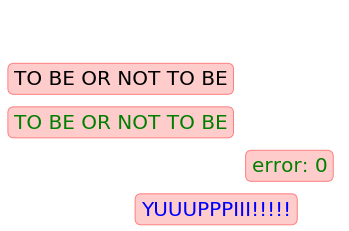

<Figure size 432x288 with 0 Axes>

In [42]:
from IPython.display import clear_output

# seed(1)

plotMyText(0.2, 10, target)

gaParam = {"popSize": 100, "noGen" : 100, "pc" : 0.8, "pm" : 0.1}

# # for a representation where len(chromosome) =  len(target)
# problParam = {'function' : fcEval, 'noDiffChars' : len(target), 'noChars' : 26}

# for a representation where  len(chromosome) =  len(set(target))
problParam = {'function' : fcEval, 'noDiffChars' : len(set(target)), 'noChars' : 26}

ga = GA(gaParam, problParam)
ga.initialisation()
ga.evaluation()

stop = False
g = -1
while (not stop and g < gaParam['noGen']):
    g += 1
    # ga.oneGeneration()
    ga.oneGenerationElitism()
    # ga.oneGenerationSteadyState()
    
    bestChromo = ga.bestChromosome()
    print('Best solution in generation ' + str(g) + ' is: x = ' + str(bestChromo.repres) + ' f(x) = ' + str(bestChromo.fitness))

    # plot the results
    clear_output(wait=True)
    plotMyText(0.2, 10, target)
    plotMyText(0.2, 7, decode(bestChromo.repres), color ='green')
    plotMyText(7.3, 4, 'error: ' + str(bestChromo.fitness), color = 'green')
    if (bestChromo.fitness == 0):
        plotMyText(4, 1, 'YUUUPPPIII!!!!!', color = 'blue')
        stop = True    
    plt.pause(0.2)
    plt.draw()
    
plt.show()

